<a href="https://colab.research.google.com/github/nurniahamid/FMCG_Noodles-optimization-suplay/blob/main/FMCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library yang digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/PORTOFOLIO DATA ANALIS/FMCG/FMCG_data.csv')
df.head(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [ ]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

- Ware_house_ID = ID unik gudang. Digunakan sebagai identifier saja
- WH_Manager_ID = ID manajer gudang. Sama seperti di atas, hanya untuk identifikasi.
- Location_type = Jenis lokasi gudang: "Urban" (kota) atau "Rural" (desa)
- WH_capacity_size = Ukuran kapasitas gudang: "Small", "Medium", atau "Large"
- Zone = Zona tempat gudang berada (misalnya: East, North, dst).
- WH_regional_zone = Wilayah regional dari zona di atas
- num_refill_req_l3m =m = Jumlah permintaan isi (refill) ulang dalam 3 bulan terakhir
- transport_issue_l1y = Jumlah masalah transportasi dalam 1 tahun terakhir
- Competitor_in_mkt = Jumlah kompetitor produk mi instan di pasar sekitar gudang
- retail_shop_num = Jumlah toko ritel yang menjual produk di bawah jangkauan gudang tersebut
- wh_owner_type = Jenis kepemilikan gudang: Owned (milik sendiri) atau Rented (sewa)
- distributor_num = Jumlah distributor yang menghubungkan gudang ke toko-toko ritel
- flood_impacted = Apakah gudang berada di daerah rawan banjir. Nilai: 1 = ya, 0 = tidak
- flood_proof = Apakah gudang memiliki perlindungan terhadap banjir
- electric_supply = Apakah gudang memiliki suplai listrik cadangan
- dist_from_hub = Jarak gudang ke pusat produksi (dalam km). Semakin jauh → semakin mahal dan sulit logistiknya
- workers_num = Jumlah pekerja di gudang
- wh_est_year = Tahun berdirinya gudang.
- storage_issue_reported_l3m = Jumlah masalah penyimpanan yang dilaporkan dalam 3 bulan terakhir
- temp_reg_mach = Apakah gudang memiliki mesin pengatur suhu (untuk menjaga kualitas produk).
- approved_wh_govt_certificate = Jenis sertifikat resmi yang dikeluarkan oleh pemerintah untuk gudang
- wh_breakdown_l3m = Jumlah kejadian gudang tidak beroperasi dalam 3 bulan terakhir
- govt_check_l3m = Jumlah kali gudang diperiksa oleh pemerintah dalam 3 bulan terakhir.
- product_wg_ton = TARGET VARIABEL: Total berat produk (mi instan) yang dikirim ke gudang dalam 3 bulan terakhir, dalam satuan ton

In [ ]:
df.shape

(25000, 24)

# Explorasi Data Awal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

- data terdiri dari 25.000 baris dan 24 kolom
- Kolom Teks/kategori, perlu di encode sebelum modelimh
  - Ware_house_ID
  - WH_Manager_ID
  - Location_type
  - WH_capacity_size
  - zone
  - WH_regional_zone
  - wh_owner_type
  - approved_wh_govt_certificate
- Kolom numerik (14 kolom):
  - num_refill_req_l3m
  - transport_issue_l1y
  - Competitor_in_mkt
  - retail_shop_num
  - distributor_num
  - flood_impacted
  - electric_supply
  - product_wg_ton

- Data float :
  - workers_num
  - wh_est_year

- Data float akan kita ubah ke data integer karena dalam penjulahan orang atau tahun itu biasanya data diskrit yang artinya tidak akan menghasilkan angka desimal


In [ ]:
print("Kolom bertipe float:")
print(df.select_dtypes(include=['float64']).columns)

Kolom bertipe float:
Index(['workers_num', 'wh_est_year'], dtype='object')


In [ ]:
df['workers_num'] = df['workers_num'].astype('Int64')
df['wh_est_year'] = df['wh_est_year'].astype('Int64')

In [ ]:
print(df.dtypes)

Ware_house_ID                   object
WH_Manager_ID                   object
Location_type                   object
WH_capacity_size                object
zone                            object
WH_regional_zone                object
num_refill_req_l3m               int64
transport_issue_l1y              int64
Competitor_in_mkt                int64
retail_shop_num                  int64
wh_owner_type                   object
distributor_num                  int64
flood_impacted                   int64
flood_proof                      int64
electric_supply                  int64
dist_from_hub                    int64
workers_num                      Int64
wh_est_year                      Int64
storage_issue_reported_l3m       int64
temp_reg_mach                    int64
approved_wh_govt_certificate    object
wh_breakdown_l3m                 int64
govt_check_l3m                   int64
product_wg_ton                   int64
dtype: object


In [ ]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.0,13119.0,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.52823,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.0,1996.0,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.0,2003.0,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.0,2009.0,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.0,2016.0,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.0,2023.0,39.000000,1.000000,6.000000,32.000000,55151.000000


Kalau kita analisis kolom target - product_wg_ton

| Statistik | Nilai        | Makna                                                                 |
| --------- | ------------ | --------------------------------------------------------------------- |
| mean      | 22102.63     | Rata-rata pengiriman adalah \~22.000 ton per gudang (dalam 3 bulan)   |
| std       | 11607.75     | Sebaran cukup besar → artinya **perbedaan antar gudang cukup tinggi** |
| min-max   | 2065 – 55151 | Ada gudang yang hanya terima 2.000 ton, ada juga 55.000 ton!          |
| median    | 22101.0      | Hampir sama dengan mean → distribusi mendekati normal                 |


# Data Cleaning

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
wh_est_year,11881
workers_num,990
approved_wh_govt_certificate,908
Ware_house_ID,0
zone,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
transport_issue_l1y,0
num_refill_req_l3m,0


yang memiliki missing value :
- wh_est_year
- workers_num
- approved_wh_govt_certificate

In [ ]:
df['workers_num'] = df['workers_num'].fillna(df['workers_num'].median())

In [ ]:
df['wh_est_year'] = df['wh_est_year'].fillna(df['wh_est_year'].median()).astype(int)
df['warehouse_age'] = 2025 - df['wh_est_year']
df.drop('wh_est_year', axis=1, inplace=True)

In [ ]:
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna('Unknown')

In [ ]:
print(f"Jumlah duplikat: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Jumlah duplikat: 0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


In [ ]:
df.dtypes

,0
Ware_house_ID,object
WH_Manager_ID,object
Location_type,object
WH_capacity_size,object
zone,object
WH_regional_zone,object
num_refill_req_l3m,int64
transport_issue_l1y,int64
Competitor_in_mkt,int64
retail_shop_num,int64


In [ ]:
df.drop(['Ware_house_ID', 'WH_Manager_ID'], axis=1, inplace=True)

In [ ]:
print(df['warehouse_age'].describe())
print(df['approved_wh_govt_certificate'].unique())

count    25000.000000
mean        15.798920
std          5.456731
min          2.000000
25%         15.000000
50%         16.000000
75%         16.000000
max         29.000000
Name: warehouse_age, dtype: float64
['A' 'A+' 'C' 'B' 'B+' 'Unknown']


# EDA

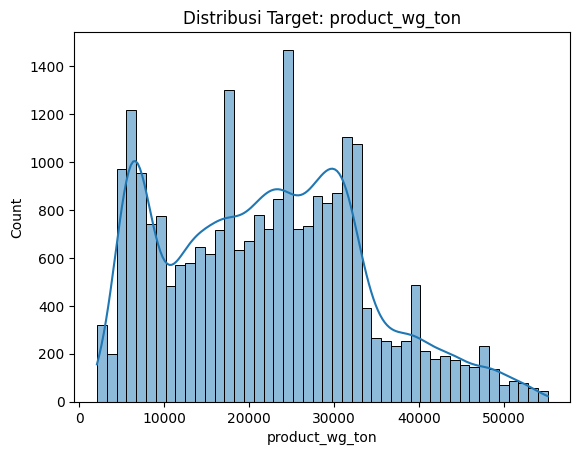

In [ ]:
sns.histplot(df['product_wg_ton'], kde=True)
plt.title('Distribusi Target: product_wg_ton')
plt.show()


Distribusi product_wg_ton (berat produk) terlihat right-skewed — banyak gudang menerima barang antara 5.000 hingga 30.000 ton, tapi ada juga yang mencapai lebih dari 50.000 ton, yang bisa jadi outlier atau gudang besar.

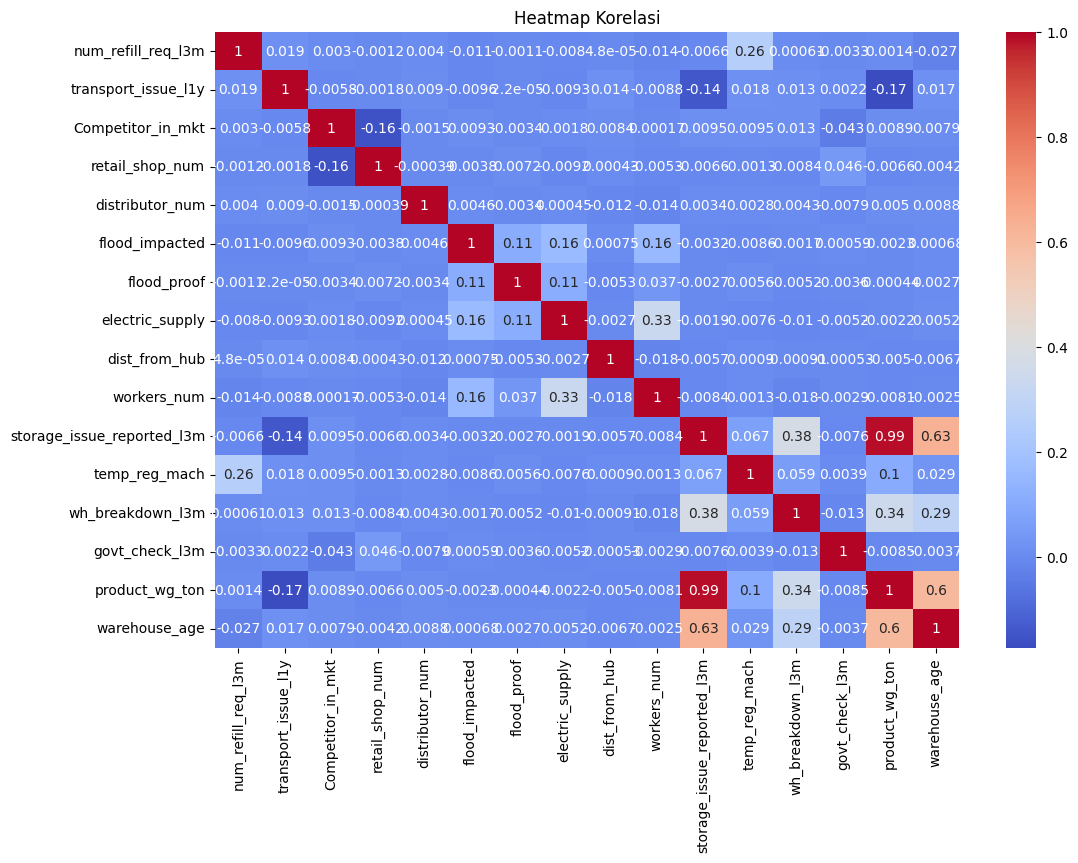

product_wg_ton                1.000000
storage_issue_reported_l3m    0.986777
warehouse_age                 0.604957
wh_breakdown_l3m              0.342685
temp_reg_mach                 0.101638
Competitor_in_mkt             0.008884
distributor_num               0.004999
num_refill_req_l3m            0.001415
flood_proof                  -0.000441
electric_supply              -0.002160
flood_impacted               -0.002299
dist_from_hub                -0.005017
retail_shop_num              -0.006615
workers_num                  -0.008072
govt_check_l3m               -0.008500
transport_issue_l1y          -0.173992
Name: product_wg_ton, dtype: float64


In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# Korelasi khusus dengan target
print(corr['product_wg_ton'].sort_values(ascending=False))


Hasil Korelasi :



### Korelasi Fitur Kategorikal terhadap Target (product_wg_ton)

Groupby + Mean

In [ ]:
categorical_features = ['Location_type', 'WH_capacity_size', 'zone',
                        'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']

for col in categorical_features:
    print(f"\nRata-rata product_wg_ton per kategori pada kolom {col}:")
    print(df.groupby(col)['product_wg_ton'].mean())



Rata-rata product_wg_ton per kategori pada kolom Location_type:
Location_type
Rural    21844.430108
Urban    25004.033774
Name: product_wg_ton, dtype: float64

Rata-rata product_wg_ton per kategori pada kolom WH_capacity_size:
WH_capacity_size
Large    22100.487855
Mid      22202.298104
Small    21899.591561
Name: product_wg_ton, dtype: float64

Rata-rata product_wg_ton per kategori pada kolom zone:
zone
East     22721.452214
North    22199.437926
South    21933.495913
West     22079.384189
Name: product_wg_ton, dtype: float64

Rata-rata product_wg_ton per kategori pada kolom WH_regional_zone:
WH_regional_zone
Zone 1    21742.712756
Zone 2    22470.728316
Zone 3    21968.146477
Zone 4    22173.378592
Zone 5    22022.588402
Zone 6    22115.559540
Name: product_wg_ton, dtype: float64

Rata-rata product_wg_ton per kategori pada kolom wh_owner_type:
wh_owner_type
Company Owned    22040.809692
Rented           22176.125810
Name: product_wg_ton, dtype: float64

Rata-rata product_wg_ton per 

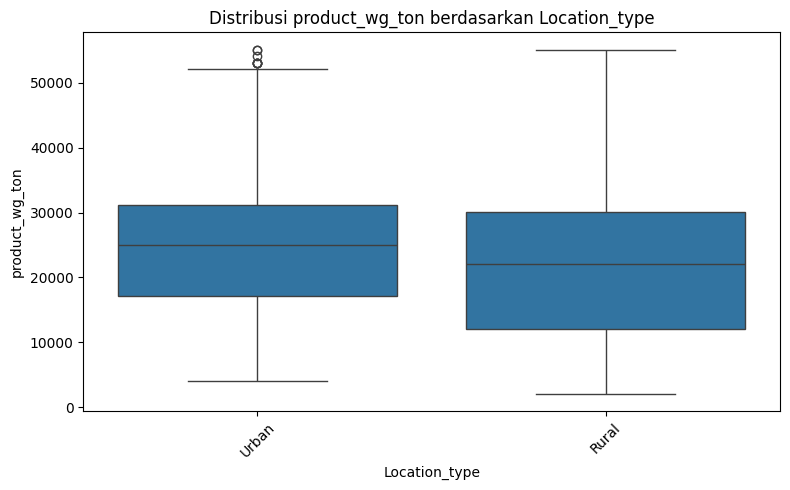

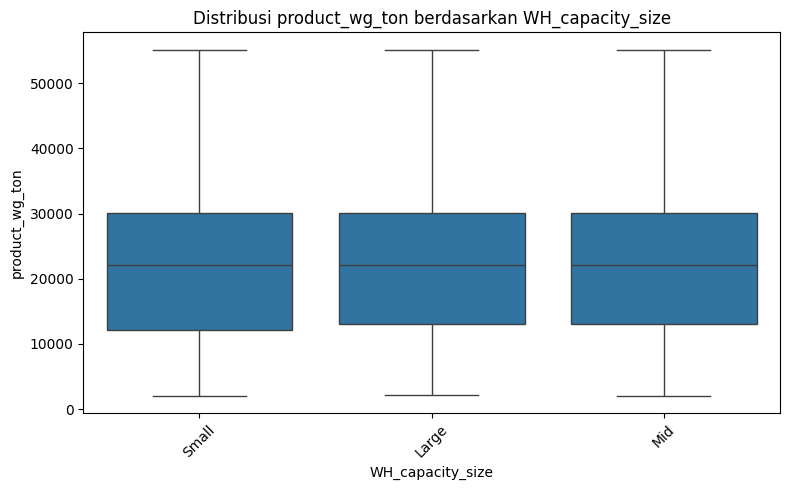

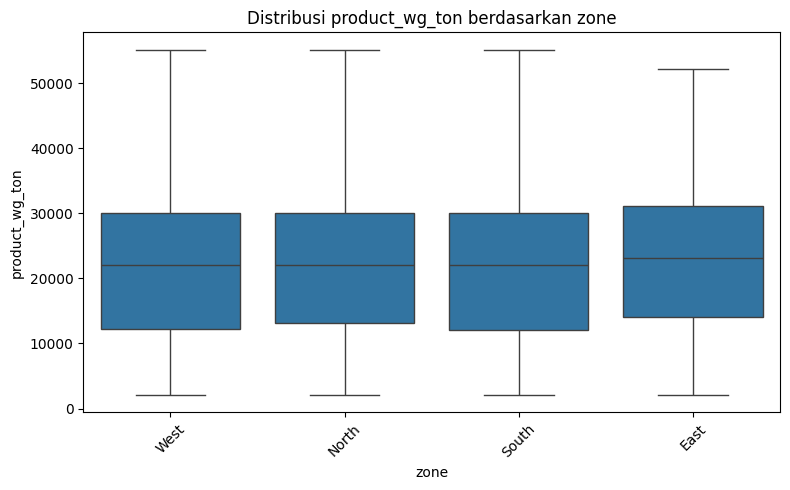

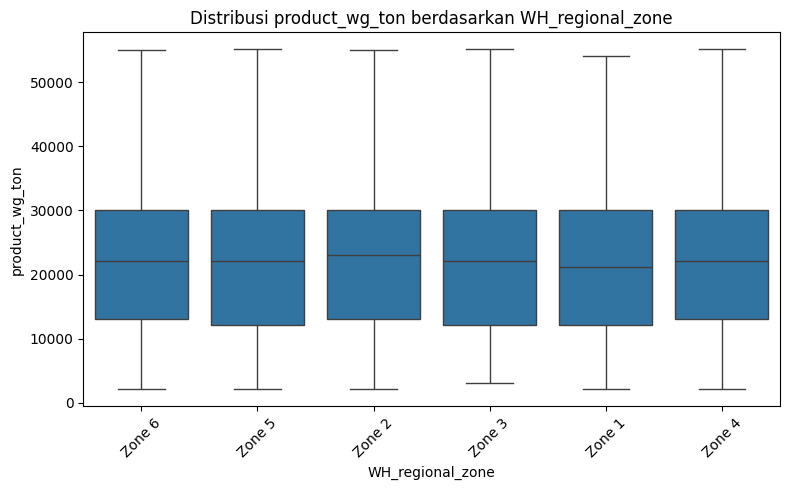

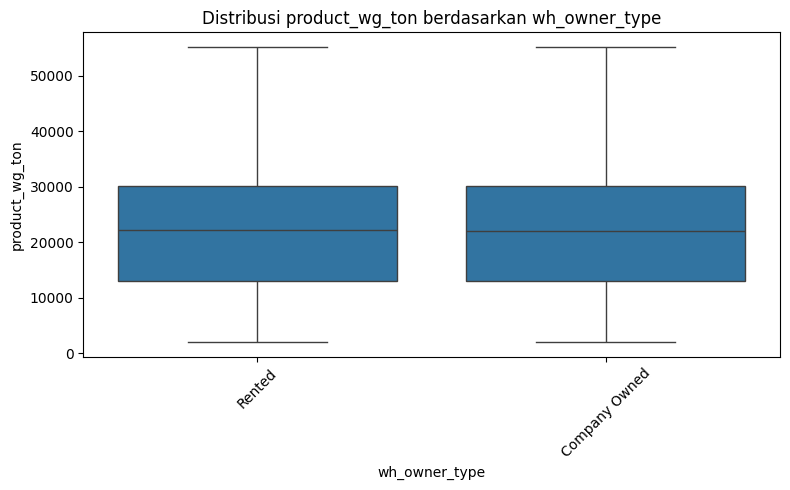

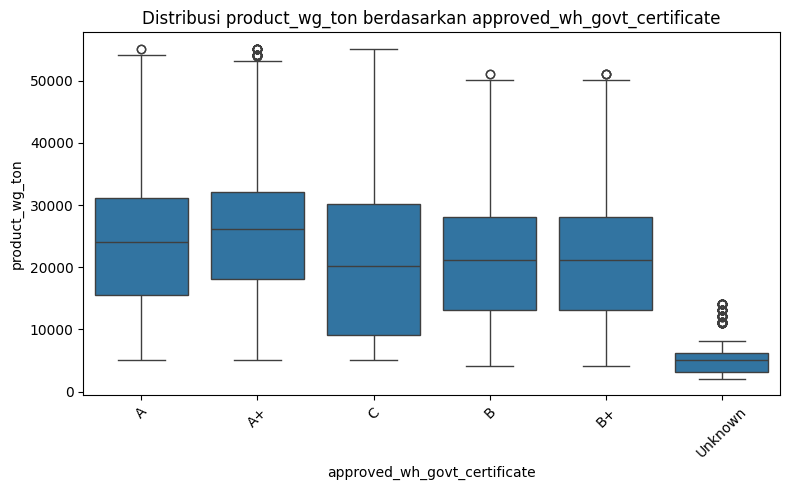

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='product_wg_ton', data=df)
    plt.title(f'Distribusi product_wg_ton berdasarkan {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Analisisnya :

1. Location_type
- Rata-rata :
  - Urban ; 25.004 ton
  - Rural : 21.844 ton
boxplot juga menunjukkan urban cenderung distribusi lebih tinggi

2. WH_capacity_size (0: Small, 1: Mid, 2: Large)
- Rata-rata
  - Small : 22.100
  - Mid: 21.899
  - Large: 22.202
perbedaannya hanya kecil, mungkin tidak terlalu informastif untuk model

3. Zone :
- Rata-rata:
  - 0: 22.721
  - 1: 22.199
  - 2: 21.933
  - 3: 22.079
  - tidak terlalu berdampak karena perbedaan sangat kecil


4. WH_regional_zone (0–5)
  - Rata-rata: 21.742 – 22.470
  - Variasi juga sangat kecil
  - Insight: Cenderung tidak perlu dimasukkan ke model


5. wh_owner_type (0, 1)
  - Rata-rata :
  - 0: 22.040
  - 1: 22.176
Hampir identik, tidak informatif

6. approved_wh_govt_certificate (Encoded 0–5)
Rata-rata:
  - 1 (A): 26.717
  - 0 (A+): 24.122
  - 2/3/4 (B/C/Unknown): 21.000-an
  - 5 (Unknown): 5.430
Gudang yang memiliki sertifikat jelas (A atau A+) → rata-rata product_wg_ton sangat tinggi.
Insight: Legalitas & kualitas gudang sangat berkorelasi dengan banyaknya produk yang ditangani. Harus masuk model.

Fitur yang paling penting untuk masuk model adalah
- Location_type dan Urban distribusi jasuh lebih besar
- approved_wh_govt_certificate karena sertifikasi berpengaruh besar terhadap distribusi

* Gudang yang berada di lokasi urban (perkotaan) menerima atau mengirim lebih banyak produk (dalam ton) dibanding gudang di lokasi rural (pedesaan).


# Data Preparation

Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location_type'] = le.fit_transform(df['Location_type'])
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])


In [ ]:
y = df['product_wg_ton']

In [ ]:
selected_features = [
    'storage_issue_reported_l3m',
    'warehouse_age',
    'wh_breakdown_l3m',
    'temp_reg_mach',
    'Location_type',
    'approved_wh_govt_certificate'
]
X = df[selected_features]


Train Test- Solit

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modeling

Menggunakan Model Random Forest Regressor
Model produksi awal dengan akurasi kuat dan insight langsung dari fitur penting.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


MAE  : 715.76
RMSE : 966.13
R²   : 0.9930


Hasil Evaluasi :
- MAE = Rata-rata kesalahan prediksi model sebesar 715.76 ton
- RMSE = Akar dari rata-rata kuadrat kesalahan prediksi = penalti lebih besar untuk error besar
- R² = Model bisa menjelaskan 99.3% variansi pada data target (product_wg_ton)

Kesimpulan:

- Model kamu sangat akurat
- R² mendekati 1 → sangat sedikit error yang tidak bisa dijelaskan
- MAE & RMSE cukup rendah → bagus untuk bisnis supply chain/logistik

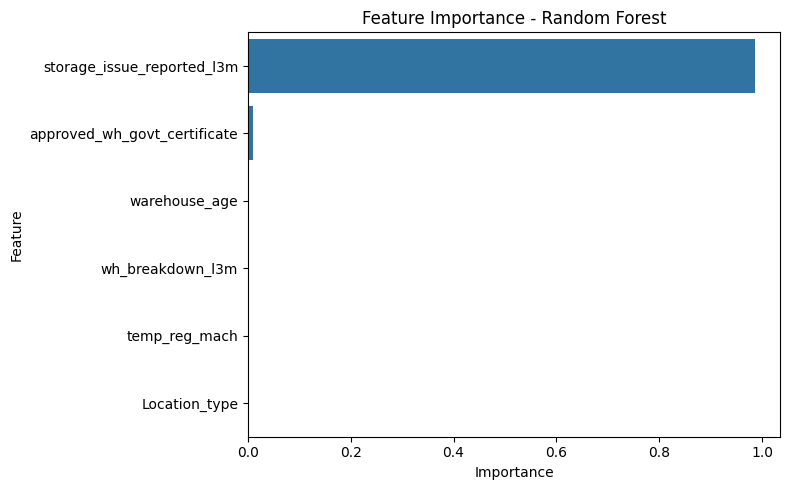

In [ ]:
feature_importance = model.feature_importances_
feat_imp_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature')
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()


Visualisasi Prediksi vs Aktual

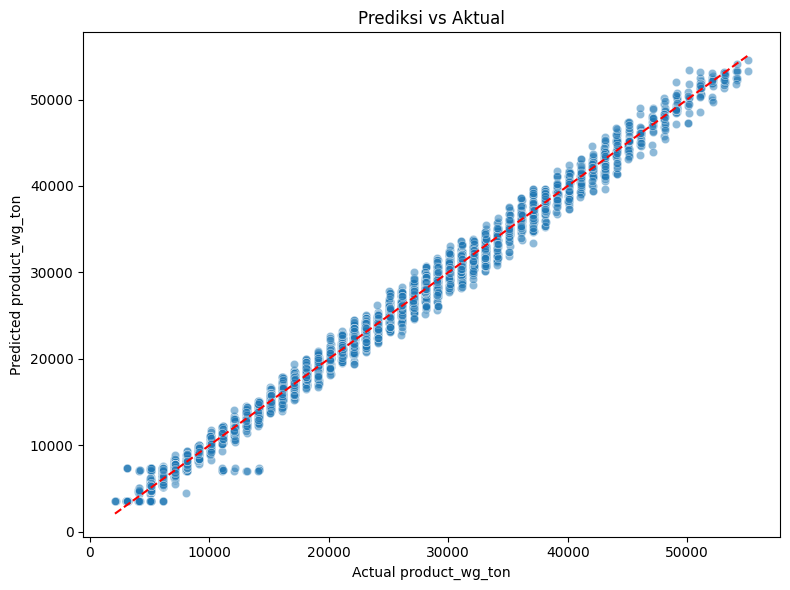

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=model.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual product_wg_ton")
plt.ylabel("Predicted product_wg_ton")
plt.title("Prediksi vs Aktual")
plt.tight_layout()
plt.show()


Distribusi Error (Residual Plot)

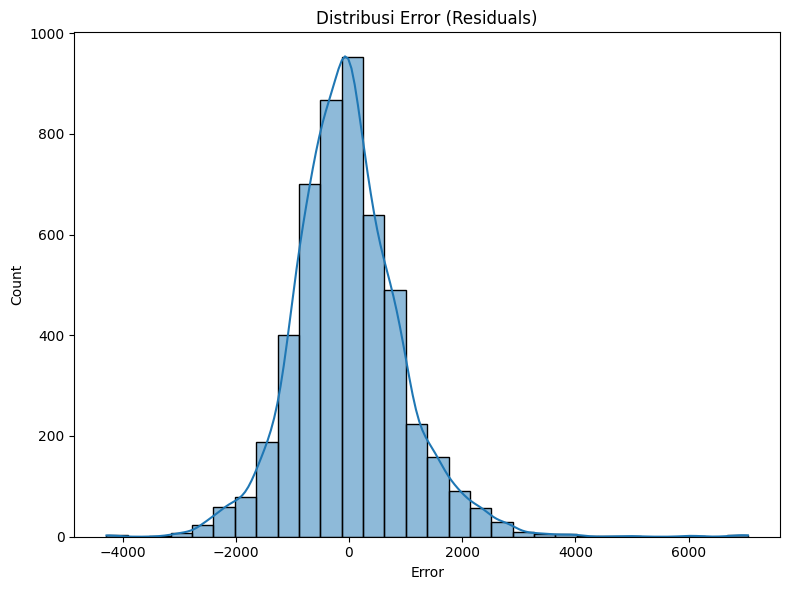

In [ ]:
residuals = y_test - model.predict(X_test)

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribusi Error (Residuals)")
plt.xlabel("Error")
plt.tight_layout()
plt.show()


Simpan Hasil Prediksi untuk Dashboard atau Analisis

In [ ]:
hasil = pd.DataFrame({
    'Actual': y_test,
    'Predicted': model.predict(X_test)
})
hasil.head()

,Actual,Predicted
6868,6058,6604.434332
24016,17073,17211.680000
9668,11101,10569.027333
13640,31095,29198.742181
14018,17134,18287.649119


In [ ]:
hasil['Error'] = hasil['Predicted'] - hasil['Actual']
hasil['Absolute_Error'] = abs(hasil['Error'])
hasil.head()

,Actual,Predicted,Error,Absolute_Error
6868,6058,6604.434332,546.434332,546.434332
24016,17073,17211.680000,138.680000,138.680000
9668,11101,10569.027333,-531.972667,531.972667
13640,31095,29198.742181,-1896.257819,1896.257819
14018,17134,18287.649119,1153.649119,1153.649119


# Simpan Model untuk Kebutuhan Streamlit

In [ ]:
import joblib
joblib.dump(model, 'model_rf.pkl')

['model_rf.pkl']

# Simpan Data untuk Tableu

In [ ]:
# Tambahkan prediksi model ke dataframe
df_export = df.copy()

# Hasil prediksi
df_export['Predicted_product_wg_ton'] = model.predict(df[selected_features])

# Ganti nama kolom target agar lebih rapi
df_export.rename(columns={'product_wg_ton': 'Actual_product_wg_ton'}, inplace=True)

# (Opsional) Tambahkan ID gudang jika belum ada
if 'warehouse_id' not in df_export.columns:
    df_export['warehouse_id'] = ['WH_' + str(i).zfill(4) for i in range(1, len(df_export)+1)]

# Pilih kolom yang ingin ditampilkan di dashboard Tableau
dashboard_cols = [
    'warehouse_id', 'zone', 'WH_regional_zone', 'Location_type',
    'approved_wh_govt_certificate', 'storage_issue_reported_l3m',
    'warehouse_age', 'Predicted_product_wg_ton', 'Actual_product_wg_ton'
]

df_dashboard = df_export[dashboard_cols]

# Simpan ke file CSV
df_dashboard.to_csv('dashboard_tableau_data.csv', index=False)

print("✅ File dashboard_tableau_data.csv berhasil disimpan!")


✅ File dashboard_tableau_data.csv berhasil disimpan!
